In [1]:
import numpy as np
from scipy.optimize import minimize

### 一般形式
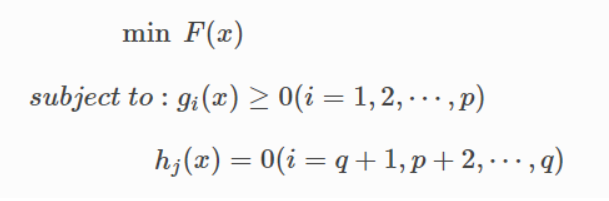

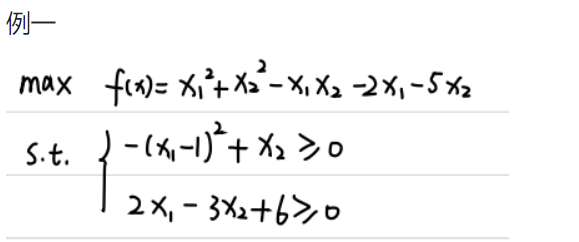

In [2]:
# 定义目标函数
def func1(x, sign=-1):
    return sign*(x[0]**2 + x[1]**2 - x[0]*x[1] - 2*x[0] - 5*x[1])
# 定义约束，ineq代表不等式约束
cons = ({'type': 'ineq',
         'fun': lambda x: -(x[0]-1)**2 + x[1]},
        {'type': 'ineq',
         'fun': lambda x: 2*x[0] - 3*x[1] + 6})
# 设定初始值
x0 = [0, 0]
res = minimize(func1, x0, constraints=cons, method='SLSQP')
print(res.x)
print(-res.fun)

[1.00023831e+00 3.79788778e-08]
-1.0000001710927542


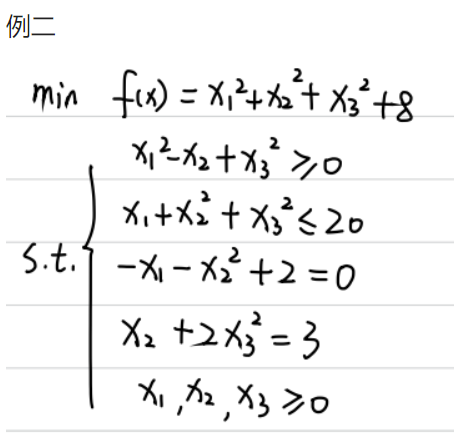

In [3]:
def func2(x, args=8):
    return x[0]**2 + x[1]**2 + x[2]**2 + args

cons = ({'type':'ineq', 'fun': lambda x: x[0]**2 - x[1] + x[2]**2},
        {'type':'ineq', 'fun': lambda x: -(x[0] + x[1]**2 + x[2]**2) + 20},
        {'type':'eq', 'fun': lambda x: x[0] + x[1]**2 - 2},
        {'type':'eq', 'fun': lambda x: x[1] + 2*x[2]**2 - 3})
# 设定参数上下界
bounds = ((0, None), (0, None), (0, None))
x0 = [0, 0, 0]
res = minimize(func2, x0, bounds=bounds, constraints=cons, method='SLSQP')
print(res.x)
print(res.fun)

[0.55216734 1.20325918 0.94782404]
10.651091840572583


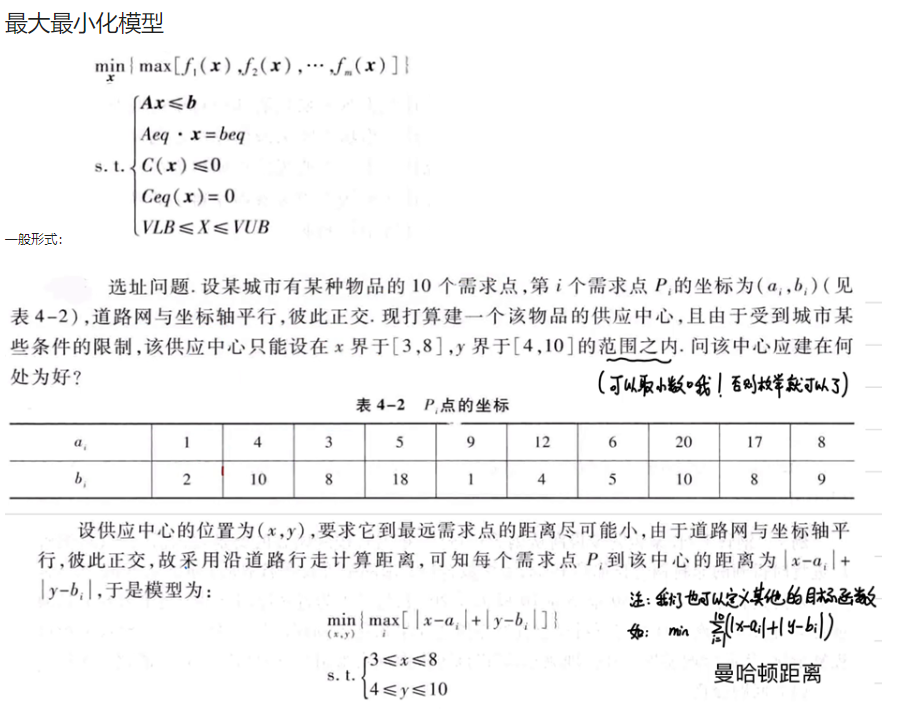

In [9]:
a = [1,4,3,5,9,12,6,20,17,8]
b = [2,10,8,18,1,4,5,10,8,9]
FUNC = list(range(10))

In [10]:
def func(x):
    for i in range(10):
        FUNC[i] = abs(x[0]-a[i]) + abs(x[1]-b[i])
    return max(FUNC)

In [11]:
bounds = [(3,8), (4,10)]
x0 = [6, 6]
res = minimize(func, x0, bounds=bounds, method="SLSQP")
print(res.x)
print(res.fun)

[7.75000019 8.75000039]
13.500000579039686


## 多目标规划
#### 对多目标函数进行加权组合，使问题变为单目标规划
- 统一为最大或最小问题
- 标准化去量纲
- 确定权重